In [43]:
import numpy as np
import scipy as sp
import pandas as pd

In [44]:
help(pd.DataFrame.query)

Help on function query in module pandas.core.frame:

query(self, expr, inplace=False, **kwargs)
    Query the columns of a frame with a boolean expression.
    
    Parameters
    ----------
    expr : string
        The query string to evaluate.  You can refer to variables
        in the environment by prefixing them with an '@' character like
        ``@a + b``.
    inplace : bool
        Whether the query should modify the data in place or return
        a modified copy
    
        .. versionadded:: 0.18.0
    
    kwargs : dict
        See the documentation for :func:`pandas.eval` for complete details
        on the keyword arguments accepted by :meth:`DataFrame.query`.
    
    Returns
    -------
    q : DataFrame
    
    Notes
    -----
    The result of the evaluation of this expression is first passed to
    :attr:`DataFrame.loc` and if that fails because of a
    multidimensional key (e.g., a DataFrame) then the result will be passed
    to :meth:`DataFrame.__getitem__`.
  

In [45]:
%precision 3

'%.3f'

In [46]:
fish_data = np.array([2,3,3,4,4,4,4,5,5,6])

In [47]:
sp.sum(fish_data)

40

In [48]:
sp.var(fish_data, ddof=0)

1.2

In [49]:
sp.var(fish_data, ddof=1)

1.3333333333333333

In [50]:
help(sp.var)

Help on function var in module numpy:

var(a, axis=None, dtype=None, out=None, ddof=0, keepdims=<no value>)
    Compute the variance along the specified axis.
    
    Returns the variance of the array elements, a measure of the spread of a
    distribution.  The variance is computed for the flattened array by
    default, otherwise over the specified axis.
    
    Parameters
    ----------
    a : array_like
        Array containing numbers whose variance is desired.  If `a` is not an
        array, a conversion is attempted.
    axis : None or int or tuple of ints, optional
        Axis or axes along which the variance is computed.  The default is to
        compute the variance of the flattened array.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, a variance is performed over multiple axes,
        instead of a single axis or all the axes as before.
    dtype : data-type, optional
        Type to use in computing the variance.  For arrays of integer t

In [51]:
sp.std(fish_data, ddof=1)

1.1547005383792515

In [52]:
sp.amax(fish_data) # a : array_likeらしい。argmaxとややこしそうだね

6

In [53]:
sp.amin(fish_data)

2

In [54]:
help(sp.amax)

Help on function amax in module numpy:

amax(a, axis=None, out=None, keepdims=<no value>, initial=<no value>)
    Return the maximum of an array or maximum along an axis.
    
    Parameters
    ----------
    a : array_like
        Input data.
    axis : None or int or tuple of ints, optional
        Axis or axes along which to operate.  By default, flattened input is
        used.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, the maximum is selected over multiple axes,
        instead of a single axis or all the axes as before.
    out : ndarray, optional
        Alternative output array in which to place the result.  Must
        be of the same shape and buffer length as the expected output.
        See `doc.ufuncs` (Section "Output arguments") for more details.
    
    keepdims : bool, optional
        If this is set to True, the axes which are reduced are left
        in the result as dimensions with size one. With this option,
        the result w

In [55]:
sp.median(fish_data)

4.0

In [56]:
from scipy import stats

In [57]:
stats.scoreatpercentile(fish_data, 25)

3.25

In [58]:
stats.scoreatpercentile(tuple(fish_data), 75)

4.75

In [59]:
fish_multi = pd.read_csv('sample/3-2-1-fish_multi.csv')
print(fish_multi)

  species  length
0       A       2
1       A       3
2       A       4
3       B       6
4       B       8
5       B      10


In [60]:
group = fish_multi.groupby("species")

In [61]:
print(group.std(ddof=1))

         length
species        
A           1.0
B           2.0


In [62]:
shoes = pd.read_csv('sample/3-2-2-shoes.csv')
print (shoes)

   store color  sales
0  tokyo  blue     10
1  tokyo   red     15
2  osaka  blue     13
3  osaka   red      9


In [63]:
cross = pd.pivot_table(
    data = shoes,
    values = 'sales',
    aggfunc = 'sum',
    index = 'store',
    columns = 'color'
)
print(cross)

color  blue  red
store           
osaka    13    9
tokyo    10   15


In [64]:
cov_data = pd.read_csv('sample/3-2-3-cov.csv')

In [65]:
x = cov_data['x']
y = cov_data['y']

In [66]:
sp.cov(x, y, ddof=0)

array([[ 3.282,  6.906],
       [ 6.906, 25.21 ]])

In [67]:
sp.corrcoef(x,y)

array([[1.   , 0.759],
       [0.759, 1.   ]])

In [68]:
from matplotlib import pyplot as plt
%matplotlib inline

In [69]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([2,3,4,3,5,4,6,7,4,8])

Text(0, 0.5, 'y')

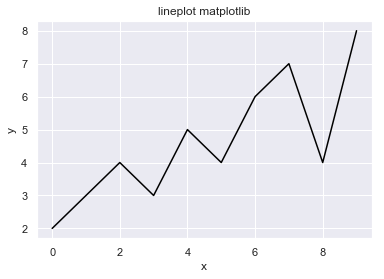

In [70]:
plt.plot(x,y,color='black')
plt.title('lineplot matplotlib')
plt.xlabel('x')
plt.ylabel('y')

In [71]:
import seaborn as sns
sns.set()

Text(0, 0.5, 'y')

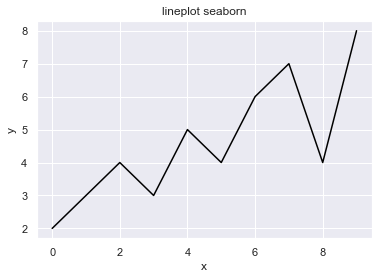

In [72]:
plt.plot(x,y,color='black')
plt.title('lineplot seaborn')
plt.xlabel('x')
plt.ylabel('y')

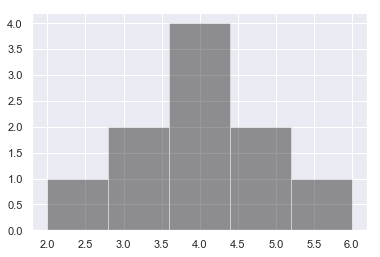

In [73]:
sns.distplot(fish_data, bins=5, color='black', kde=False)

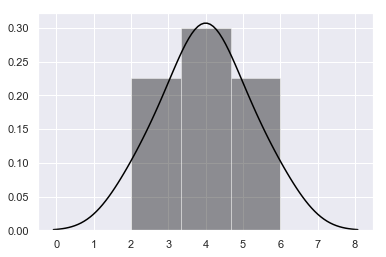

In [74]:
sns.distplot(fish_data, color='black') # カーネル密度推定あり

In [75]:
fish_multi = pd.read_csv('sample/3-3-2-fish_multi_2.csv')
print(fish_multi)

   species  length
0        A       2
1        A       3
2        A       3
3        A       4
4        A       4
5        A       4
6        A       4
7        A       5
8        A       5
9        A       6
10       B       5
11       B       6
12       B       6
13       B       7
14       B       7
15       B       7
16       B       7
17       B       8
18       B       8
19       B       9


In [76]:
fish_multi.groupby('species').describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

In [77]:
length_a = fish_multi.query('species=="A"')['length']
length_b = fish_multi.query('species=="B"')['length']

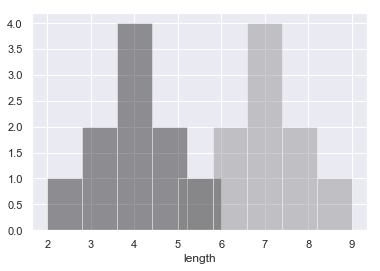

In [78]:
sns.distplot(length_a, bins=5, color='black',kde=False)
sns.distplot(length_b, bins=5, color='gray',kde=False)

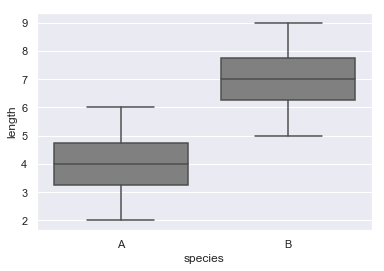

In [79]:
sns.boxplot(x='species', y='length', data=fish_multi, color='gray')

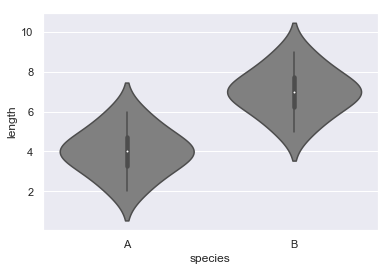

In [80]:
sns.violinplot(x='species', y='length', data=fish_multi, color='gray')

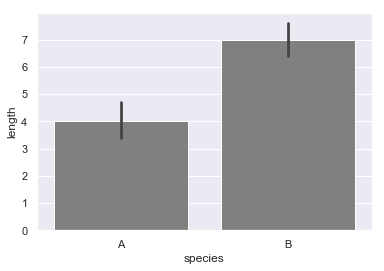

In [81]:
sns.barplot(x='species',y='length',data=fish_multi,color='gray')

In [83]:
cov_data = pd.read_csv('sample/3-2-3-cov.csv')

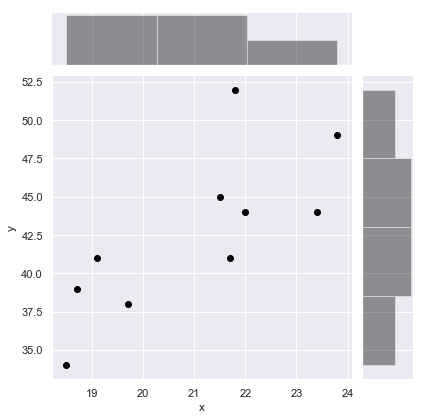

In [84]:
sns.jointplot(x='x', y='y', data=cov_data, color='black')

In [85]:
iris = sns.load_dataset('iris')
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [86]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


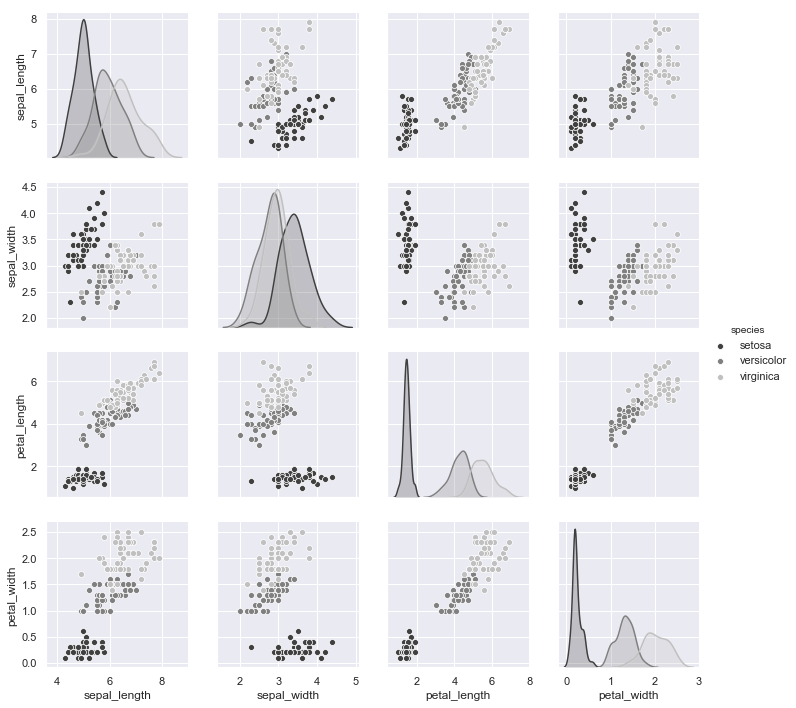

In [87]:
sns.pairplot(iris,hue='species',palette='gray')

In [89]:
# chapter4

In [90]:
fish_5 = np.array([2,3,4,5,6])
fish_5

array([2, 3, 4, 5, 6])

In [92]:
np.random.choice(fish_5,size=1,replace=False)

array([4])

In [93]:
fish_100000 = pd.read_csv('sample/3-4-1-fish_length_100000.csv')['length']

In [94]:
sampling_result = np.random.choice(fish_100000, size=10, replace=False)

In [95]:
sp.std(fish_100000, ddof=0)

0.8

In [96]:
sp.var(fish_100000, ddof=0)

0.64

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


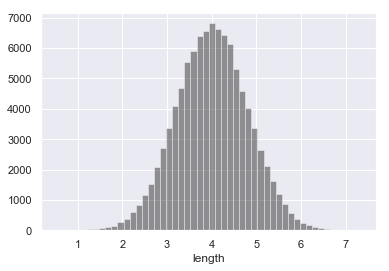

In [97]:
sns.distplot(fish_100000, kde=False,color='black')

In [105]:
x = np.arange(start=1, stop=7.1, step=0.1)
x

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. ])

In [106]:
stats.norm.pdf(x=x,loc=4,scale=0.8)

array([4.407e-04, 6.988e-04, 1.091e-03, 1.676e-03, 2.536e-03, 3.778e-03,
       5.540e-03, 7.998e-03, 1.137e-02, 1.591e-02, 2.191e-02, 2.971e-02,
       3.967e-02, 5.215e-02, 6.749e-02, 8.598e-02, 1.078e-01, 1.332e-01,
       1.619e-01, 1.938e-01, 2.283e-01, 2.648e-01, 3.025e-01, 3.401e-01,
       3.764e-01, 4.102e-01, 4.401e-01, 4.648e-01, 4.833e-01, 4.948e-01,
       4.987e-01, 4.948e-01, 4.833e-01, 4.648e-01, 4.401e-01, 4.102e-01,
       3.764e-01, 3.401e-01, 3.025e-01, 2.648e-01, 2.283e-01, 1.938e-01,
       1.619e-01, 1.332e-01, 1.078e-01, 8.598e-02, 6.749e-02, 5.215e-02,
       3.967e-02, 2.971e-02, 2.191e-02, 1.591e-02, 1.137e-02, 7.998e-03,
       5.540e-03, 3.778e-03, 2.536e-03, 1.676e-03, 1.091e-03, 6.988e-04,
       4.407e-04])

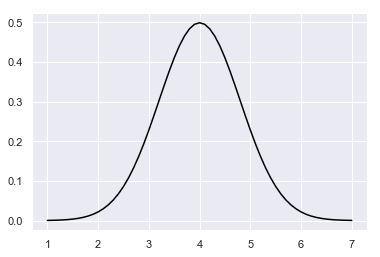

In [107]:
plt.plot(x,stats.norm.pdf(x=x,loc=4,scale=0.8),color='black')

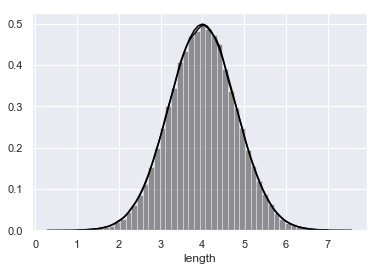

In [110]:
sns.distplot(fish_100000, norm_hist=True,color='black') # 面積が1になる
plt.plot(x,stats.norm.pdf(x=x,loc=4,scale=0.8),color='black')

In [117]:
sampling_norm = stats.norm.rvs(loc=4,scale=0.8,size=10)

In [118]:
sampling_norm

array([3.558, 4.191, 3.458, 2.885, 3.907, 3.693, 3.713, 3.546, 4.093,
       3.617])

In [119]:
sp.mean(sampling_norm)

3.6662360526464766

In [120]:
# chapter5

In [121]:
population = stats.norm(loc=4, scale=0.8)

In [122]:
sample_mean_array = np.zeros(10000)

In [124]:
np.random.seed(1)
for i in range(0,10000):
    sample = population.rvs(size=10)
    sample_mean_array[i] = sp.mean(sample)

In [125]:
sample_mean_array

array([3.922, 3.864, 4.07 , ..., 4.136, 4.575, 4.099])

In [127]:
help(stats.norm.rvs)

Help on method rvs in module scipy.stats._distn_infrastructure:

rvs(*args, **kwds) method of scipy.stats._continuous_distns.norm_gen instance
    Random variates of given type.
    
    Parameters
    ----------
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information).
    loc : array_like, optional
        Location parameter (default=0).
    scale : array_like, optional
        Scale parameter (default=1).
    size : int or tuple of ints, optional
        Defining number of random variates (default is 1).
    random_state : None or int or ``np.random.RandomState`` instance, optional
        If int or RandomState, use it for drawing the random variates.
        If None, rely on ``self.random_state``.
        Default is None.
    
    Returns
    -------
    rvs : ndarray or scalar
        Random variates of given `size`.



In [128]:
sp.mean(sample_mean_array)

4.004202422791747

In [131]:
sp.std(sample_mean_array, ddof=1)

0.2513580850860402

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


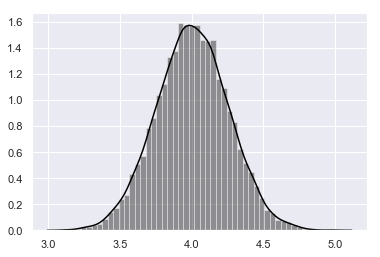

In [132]:
sns.distplot(sample_mean_array, color='black')

In [133]:
size_array = np.arange(start=10, stop=100100, step=100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [134]:
sample_mean_array_size = np.zeros(len(size_array))

In [135]:
np.random.seed(1)
for i in range(0,len(size_array)):
    sample = population.rvs(size=size_array[i])
    sample_mean_array_size[i] = sp.mean(sample)

Text(0, 0.5, 'sample mean')

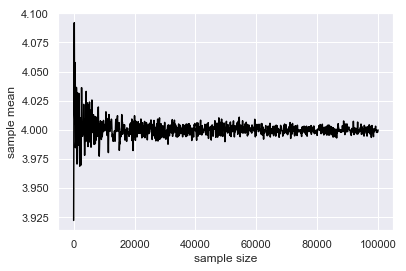

In [136]:
plt.plot(size_array, sample_mean_array_size, color='black')
plt.xlabel('sample size')
plt.ylabel('sample mean')

In [138]:
def calc_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(0, n_trial):
        sample = population.rvs(size=size)
        sample_mean_array[i] = sp.mean(sample)
    return (sample_mean_array)

In [140]:
np.random.seed(1)
sp.mean(calc_sample_mean(size=10,n_trial=10000))

4.004202422791747

In [141]:
size_array = np.arange(
start=2, stop=102, step=2)
size_array

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

In [142]:
sample_mean_std_array = np.zeros(len(size_array))

In [143]:
np.random.seed(1)
for i in range(0,len(size_array)):
    sample_mean = calc_sample_mean(size=size_array[i],n_trial=100)
    sample_mean_std_array[i]=sp.std(sample_mean, ddof=1)

Text(0, 0.5, 'mean_std value')

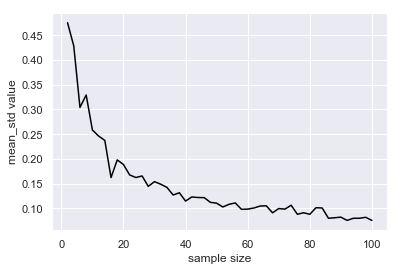

In [144]:
plt.plot(size_array, sample_mean_std_array, color='black')
plt.xlabel('sample size')
plt.ylabel('mean_std value')

In [145]:
standard_error = 0.8 / np.sqrt(size_array)
standard_error

array([0.566, 0.4  , 0.327, 0.283, 0.253, 0.231, 0.214, 0.2  , 0.189,
       0.179, 0.171, 0.163, 0.157, 0.151, 0.146, 0.141, 0.137, 0.133,
       0.13 , 0.126, 0.123, 0.121, 0.118, 0.115, 0.113, 0.111, 0.109,
       0.107, 0.105, 0.103, 0.102, 0.1  , 0.098, 0.097, 0.096, 0.094,
       0.093, 0.092, 0.091, 0.089, 0.088, 0.087, 0.086, 0.085, 0.084,
       0.083, 0.083, 0.082, 0.081, 0.08 ])

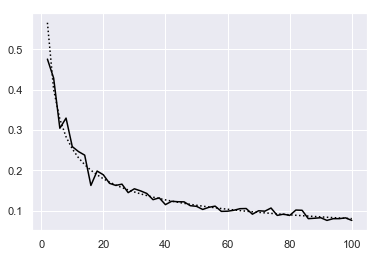

In [147]:
plt.plot(size_array, sample_mean_std_array, color='black')
plt.plot(size_array, standard_error, color='black', linestyle='dotted')

In [148]:
# 中心極限定理

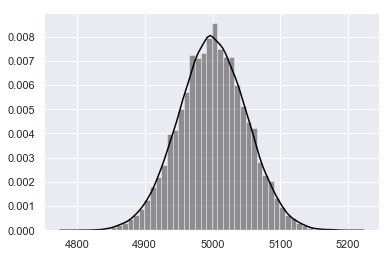

In [149]:
n_size = 10000
n_trial = 50000
coin = np.array([0,1])
count_coin = np.zeros(n_trial)
np.random.seed(1)
for i in range(0, n_trial):
    count_coin[i] = np.sum(np.random.choice(coin, size=n_size,replace=True))
sns.distplot(count_coin, color='black')

In [150]:
# chapter6

In [152]:
stats.norm.pdf(loc=4, scale=0.8, x=3) # 確率密度 Probability density function

0.2283113567362774

In [154]:
norm_dist = stats.norm(loc=4, scale=0.8)
norm_dist.pdf(x=3)

0.2283113567362774

In [155]:
stats.norm.cdf(loc=4, scale=0.8, x=3) # 累積分布 cumulative distribution function # 平均4,標準偏差0.8

0.10564977366685535

In [156]:
stats.norm.cdf(loc=4, scale=0.8, x=4)

0.5

In [165]:
stats.norm.ppf(loc=4, scale=0.8, q=0.025)

2.4320288123679563

In [159]:
help(stats.norm.ppf)

Help on method ppf in module scipy.stats._distn_infrastructure:

ppf(q, *args, **kwds) method of scipy.stats._continuous_distns.norm_gen instance
    Percent point function (inverse of `cdf`) at q of the given RV.
    
    Parameters
    ----------
    q : array_like
        lower tail probability
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    x : array_like
        quantile corresponding to the lower tail probability q.



In [168]:
sitagawa = stats.norm.cdf(loc=4, scale=0.8, x=0.3)
stats.norm.ppf(loc=4, scale=0.8, q=sitagawa)

0.2999999999999998

In [169]:
stats.norm.ppf(loc=4, scale=0.8, q=0.5)

4.0

In [181]:
np.random.seed(1)
t_value_array = np.zeros(10000)
norm_dist = stats.norm(loc=4, scale=0.8)
for i in range(0,10000):
    sample = norm_dist.rvs(size=10)
    sample_mean=sp.mean(sample)
    sample_std=sp.std(sample,ddof=1)
    sample_se = sample_std / sp.sqrt(len(sample))
    t_value_array[i] = (sample_mean-4)/sample_se

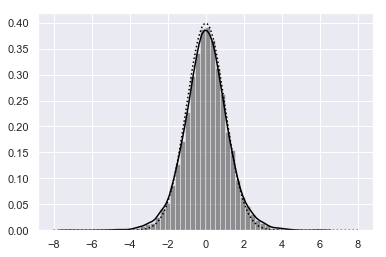

In [185]:
sns.distplot(t_value_array,color='black')
x = np.arange(start=-8, stop=8.1, step=0.1)
plt.plot(x,stats.norm.pdf(x=x),color='black',linestyle='dotted')

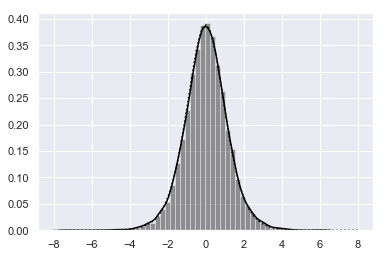

In [187]:
sns.distplot(t_value_array, color='black', norm_hist=True)
plt.plot(x, stats.t.pdf(x=x,df=9),color='black',linestyle='dotted')

In [188]:
# chapter7

In [190]:
fish = pd.read_csv('sample/3-7-1-fish_length.csv')['length']
fish

0    4.352982
1    3.735304
2    5.944617
3    3.798326
4    4.087688
5    5.265985
6    3.272614
7    3.526691
8    4.150083
9    3.736104
Name: length, dtype: float64

In [195]:
mu = sp.mean(fish)

In [192]:
sigma_2 = sp.var(fish, ddof=1)
sigma_2

0.6803017080832622

In [193]:
df = len(fish)-1

In [194]:
sigma = sp.std(fish, ddof=1)
se = sigma / sp.sqrt(len(fish))
se

0.2608259396768776

In [196]:
interval = stats.t.interval(alpha=0.95, df=df, loc=mu, scale=se)
interval

(3.597010056835825, 4.777068592173221)

In [198]:
t_975 = stats.t.ppf(q=0.975,df=df)
t_975

2.2621571627409915

In [199]:
lower = mu - t_975 * se
lower

3.597010056835825

In [200]:
upper = mu + t_975 * se
upper

4.777068592173221

In [201]:
# chapter8

In [202]:
junk_food = pd.read_csv('sample/3-8-1-junk-food-weight.csv')['weight']
junk_food.head()

0    58.529820
1    52.353039
2    74.446169
3    52.983263
4    55.876879
Name: weight, dtype: float64

In [203]:
mu = sp.mean(junk_food)
mu

55.38496619666667

In [204]:
df = len(junk_food) - 1
df

19

In [205]:
sigma = sp.std(junk_food, ddof=1)
se = sigma/sp.sqrt(len(junk_food))
se

1.957927680575589

In [208]:
t_value = (mu-50)/se
t_value

2.750339683171343

In [209]:
alpha = stats.t.cdf(t_value, df=df)
(1-alpha)*2

0.012725590012524046

In [210]:
stats.ttest_1samp(junk_food, 50)

Ttest_1sampResult(statistic=2.750339683171343, pvalue=0.012725590012524182)

In [212]:
size = len(junk_food)
sigma = sp.std(junk_food, ddof=1)

In [213]:
t_value_array = np.zeros(50000)

In [215]:
paired_test_data = pd.read_csv('sample/3-9-1-paired-t-test.csv')
print(paired_test_data)

  person medicine  body_temperature
0      A   before              36.2
1      B   before              36.2
2      C   before              35.3
3      D   before              36.1
4      E   before              36.1
5      A    after              36.8
6      B    after              36.1
7      C    after              36.8
8      D    after              37.1
9      E    after              36.9


In [221]:
before = paired_test_data.query(
'medicine=="before"')['body_temperature']
after = paired_test_data.query(
'medicine=="after"')['body_temperature']

In [224]:
before = np.array(before)
after = np.array(after)
diff = after-before
diff

array([ 0.6, -0.1,  1.5,  1. ,  0.8])

In [225]:
stats.ttest_1samp(diff,0)

Ttest_1sampResult(statistic=2.901693483620596, pvalue=0.044043109730074276)

In [223]:
mean_bef = sp.mean(before)
mean_aft = sp.mean(after)
sigma_bef = sp.var(before, ddof=1)
sigma_aft = sp.var(after, ddof=1)
m = len(before)
n = len(after)
t_value = (mean_aft - mean_bef) / sp.sqrt((sigma_bef/m+sigma_aft/n))
t_value

3.1557282344421034

In [226]:
stats.ttest_ind(after,before,equal_var=False)

Ttest_indResult(statistic=3.1557282344421034, pvalue=0.013484775682079892)

In [227]:
1 - sp.stats.chi2.cdf(x=6.667,df=1)

0.009821437357809604

In [228]:
click_data = pd.read_csv('sample/3-10-1-click_data.csv')

In [229]:
cross = pd.pivot_table(data=click_data, values='freq',aggfunc='sum',index='color',columns='click')

In [230]:
cross

click,click,not
color,,
blue,20,230
red,10,40


In [232]:
sp.stats.chi2_contingency(cross,correction=False)

(6.666666666666666, 0.009823274507519247, 1, array([[ 25., 225.],
        [  5.,  45.]]))

In [ ]:
# 